In [21]:
import bs4 as bs
import pickle
import requests

ModuleNotFoundError: No module named 'bs4'

In [ ]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17'}
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies',
                        headers=headers)
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)

    return tickers
save_sp500_tickers()

In [ ]:
from yahoo_fin.stock_info import *

In [ ]:
https://gist.github.com/yhilpisch/e040b66c80ee3755c7473ed9f8ce64f8#file-01_fxcm_hist_data-ipynb

In [28]:
import pandas as pd
path = "http://hilpisch.com/eurusd.csv"
data = pd.read_csv(path, index_col=0, parse_dates=True)
data.to_csv('./eurusd.csv',index=False)

In [4]:
import pandas as pd
data = pd.read_csv('./eurusd.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 10 columns):
Time          2820 non-null object
OpenBid       2820 non-null float64
HighBid       2820 non-null float64
LowBid        2820 non-null float64
CloseBid      2820 non-null float64
OpenAsk       2820 non-null float64
HighAsk       2820 non-null float64
LowAsk        2820 non-null float64
CloseAsk      2820 non-null float64
TotalTicks    2820 non-null int64
dtypes: float64(8), int64(1), object(1)
memory usage: 220.4+ KB


In [3]:
data.head()

,Time,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,TotalTicks
0,21:00:00,1.34456,1.34986,1.34316,1.34886,1.34474,1.35004,1.34334,1.34904,5259
1,21:00:00,1.34886,1.35536,1.34876,1.35226,1.34904,1.35554,1.34894,1.35244,6110
2,21:00:00,1.35226,1.35376,1.34846,1.35026,1.35244,1.35394,1.34864,1.35044,5875
3,21:00:00,1.35026,1.35116,1.34216,1.34326,1.35044,1.35134,1.34234,1.34344,7361
4,21:00:00,1.34326,1.34356,1.33196,1.33676,1.34344,1.34374,1.33214,1.33694,8238


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

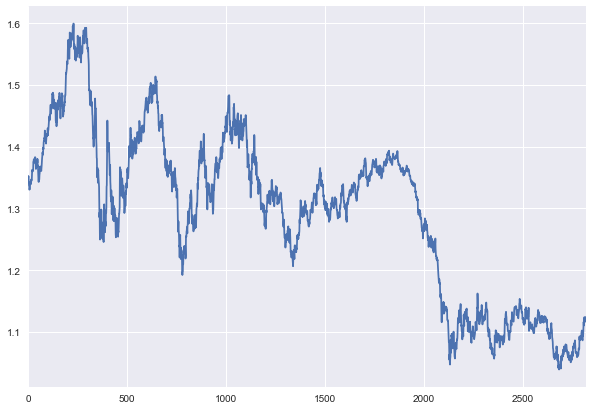

In [6]:
#plt.style.use('classic')
plt.style.use('seaborn')
plt.figure(figsize=(10,7))
data['CloseAsk'].plot()

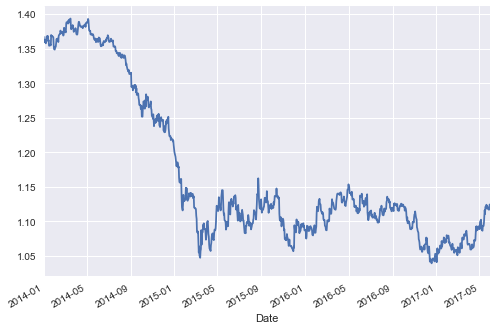

In [33]:
data1 = data.loc['2014-1-1':]
data1['CloseAsk'].plot()

In [7]:
data['CloseMid'] = data[['CloseAsk','CloseBid']].mean(axis=1)

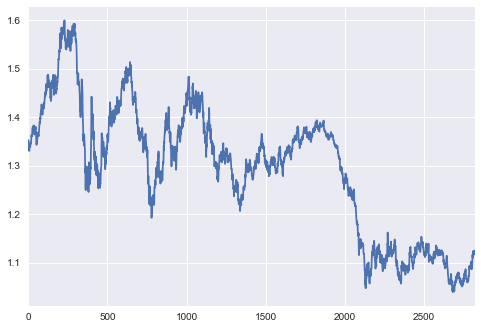

In [8]:
data['CloseMid'].plot()

In [14]:
data['MA10'] = data['CloseMid'].rolling(10).mean()
data['MA30'] = data['CloseMid'].rolling(30).mean()
data['MA90'] = data['CloseMid'].rolling(90).mean()
data['MA200'] = data['CloseMid'].rolling(200).mean()

In [15]:
data.dropna(inplace=True)

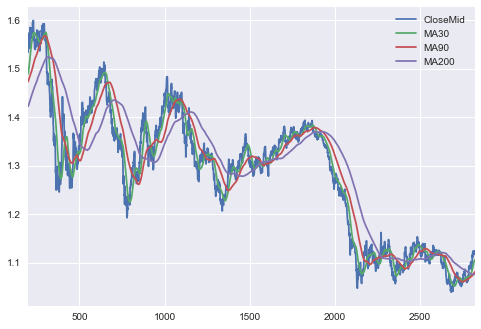

In [16]:
data[['CloseMid','MA30','MA90','MA200']].plot()

In [17]:
import numpy as np
data['Position'] = np.where(data['MA10']>data['MA200'],1,-1)

(-1.2, 1.2)

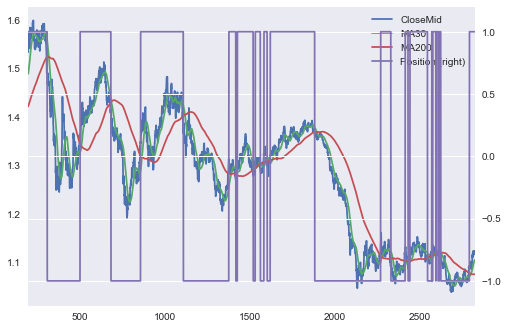

In [18]:
data[['CloseMid','MA30','MA200','Position']].plot(secondary_y='Position')
plt.ylim(-1.2,1.2)

In [19]:
data['Return'] = np.log(data['CloseMid']/data['CloseMid'].shift(1))

In [14]:
data['Strategy'] = data['Position'].shift(1)*data['Return']

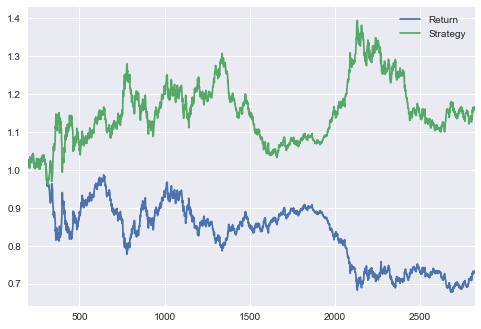

In [15]:
data[['Return','Strategy']].dropna().cumsum().apply(np.exp).plot()

In [16]:
from fxcmpy import fxcmpy_tick_data_reader as tdr

In [17]:
tdr.get_available_symbols()

('AUDCAD',
 'AUDCHF',
 'AUDJPY',
 'AUDNZD',
 'CADCHF',
 'EURAUD',
 'EURCHF',
 'EURGBP',
 'EURJPY',
 'EURUSD',
 'GBPCHF',
 'GBPJPY',
 'GBPNZD',
 'GBPUSD',
 'GBPCHF',
 'GBPJPY',
 'GBPNZD',
 'NZDCAD',
 'NZDCHF',
 'NZDJPY',
 'NZDUSD',
 'USDCAD',
 'USDCHF',
 'USDJPY')

In [18]:
import pandas as pd
import numpy as np
import datetime as dt

In [19]:
t0 = dt.datetime(2018,8,1)
t1 = dt.datetime(2018,8,27)
td = tdr('EURUSD',t0,t1)

In [20]:
type(td)

fxcmpy.fxcmpy_data_reader.fxcmpy_tick_data_reader

In [21]:
td.get_raw_data().info()

<class 'pandas.core.frame.DataFrame'>
Index: 6316325 entries, 07/29/2018 21:00:01.543 to 08/24/2018 20:59:14.791
Data columns (total 2 columns):
Bid    float64
Ask    float64
dtypes: float64(2)
memory usage: 144.6+ MB


In [22]:
td.get_raw_data().tail()

,Bid,Ask
DateTime,,
08/24/2018 20:59:01.587,1.16206,1.16225
08/24/2018 20:59:03.521,1.16209,1.16228
08/24/2018 20:59:10.286,1.16209,1.16227
08/24/2018 20:59:11.739,1.16197,1.16235
08/24/2018 20:59:14.791,1.16194,1.16238


In [23]:
td.get_data().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6316325 entries, 2018-07-29 21:00:01.543000 to 2018-08-24 20:59:14.791000
Data columns (total 2 columns):
Bid    float64
Ask    float64
dtypes: float64(2)
memory usage: 144.6 MB


In [24]:
fx=td.get_data()

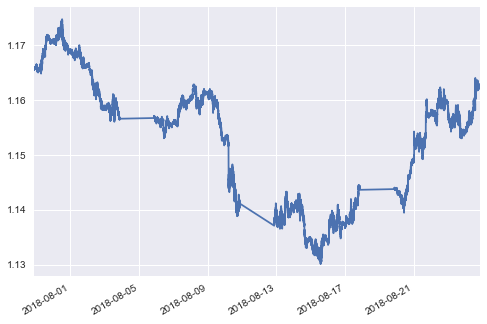

In [25]:
fx['Bid'].plot()

In [26]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6316325 entries, 2018-07-29 21:00:01.543000 to 2018-08-24 20:59:14.791000
Data columns (total 2 columns):
Bid    float64
Ask    float64
dtypes: float64(2)
memory usage: 144.6 MB


In [27]:
fx1 = fx.resample('1min',label='right').last().ffill()

In [28]:
fx1['Mid'] = fx1.mean(axis=1)

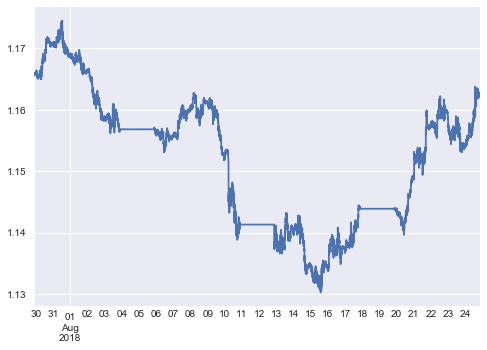

In [29]:
fx1['Mid'].plot()

In [30]:
from fxcmpy import fxcmpy_candles_data_reader as cdr

In [31]:
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [32]:
t0=dt.datetime(2018,3,1)
t1=dt.datetime(2018,3,25)

In [33]:
candles=cdr('EURUSD',t0,t1,'H1')

In [34]:
data=candles.get_data()

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 480 entries, 2018-02-25 22:00:00 to 2018-03-23 20:00:00
Data columns (total 8 columns):
BidOpen     480 non-null float64
BidHigh     480 non-null float64
BidLow      480 non-null float64
BidClose    480 non-null float64
AskOpen     480 non-null float64
AskHigh     480 non-null float64
AskLow      480 non-null float64
AskClose    480 non-null float64
dtypes: float64(8)
memory usage: 33.8 KB


In [36]:
data.head()

,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
2018-02-25 22:00:00,1.22931,1.22938,1.22849,1.22871,1.22948,1.22973,1.22862,1.22891
2018-02-25 23:00:00,1.22871,1.22949,1.22810,1.22884,1.22891,1.22952,1.22812,1.22887
2018-02-26 00:00:00,1.22884,1.22933,1.22802,1.22897,1.22887,1.22934,1.22804,1.22900
2018-02-26 01:00:00,1.22897,1.23050,1.22881,1.22987,1.22900,1.23051,1.22882,1.22989
2018-02-26 02:00:00,1.22987,1.23190,1.22981,1.23151,1.22989,1.23191,1.22982,1.23153


In [37]:
sub = pd.DataFrame({'Mid': (candles.get_data()['BidClose'] + candles.get_data()['AskClose']) / 2},
                  index = candles.get_data().index)
sub['Returns'] = np.log(sub / sub.shift(1))
sub.head()

,Mid,Returns
2018-02-25 22:00:00,1.228810,NaN
2018-02-25 23:00:00,1.228855,0.000037
2018-02-26 00:00:00,1.228985,0.000106
2018-02-26 01:00:00,1.229880,0.000728
2018-02-26 02:00:00,1.231520,0.001333


array([<matplotlib.axes._subplots.AxesSubplot object at 0x151fb0b70>,
      dtype=object)

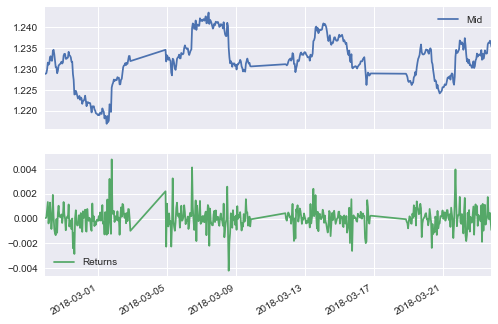

In [39]:
sub.plot(subplots=True)

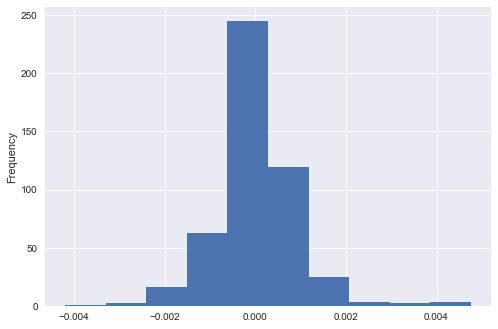

In [41]:
sub['Returns'].plot(kind='hist')

In [42]:
data = candles.get_data()[['AskOpen', 'AskHigh', 'AskLow', 'AskClose']]
data.columns = ['open', 'high', 'low', 'close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 480 entries, 2018-02-25 22:00:00 to 2018-03-23 20:00:00
Data columns (total 4 columns):
open     480 non-null float64
high     480 non-null float64
low      480 non-null float64
close    480 non-null float64
dtypes: float64(4)
memory usage: 18.8 KB


In [45]:
data = pd.DataFrame(candles.get_data()[['AskClose', 'BidClose']].mean(axis=1),
                    columns=['midclose'])

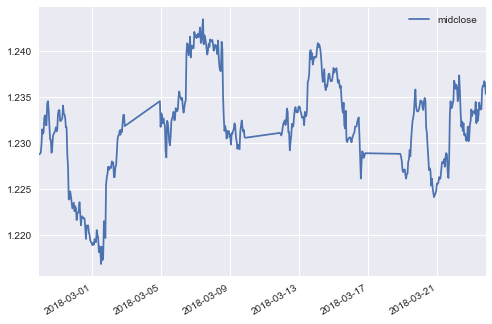

In [46]:
data.plot()

In [47]:
data['returns'] = np.log(data / data.shift(1))

In [48]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = 'lag_%s' % lag
    data[col] = data['returns'].shift(lag)
    cols.append(col)

In [56]:
cols

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

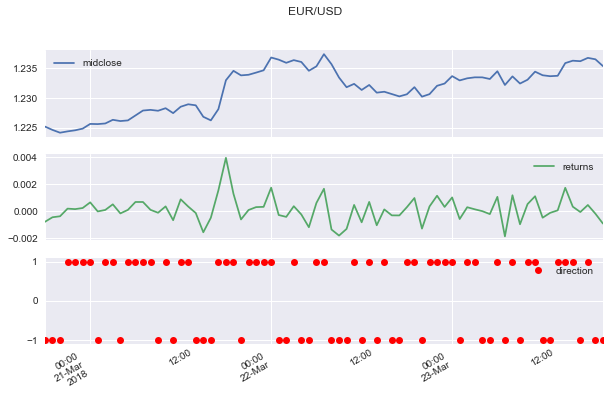

In [57]:
data['direction'] = np.sign(data['returns'])
to_plot = ['midclose', 'returns', 'direction']
data[to_plot].iloc[-75:].plot(figsize=(10, 6),
        subplots=True, style=['-', '-', 'ro'], title='EUR/USD')
data.dropna(inplace=True)

In [58]:
from sklearn import svm

In [59]:
model = svm.SVC(C=100)

In [60]:
model.fit(np.sign(data[cols]), np.sign(data['returns']))

/anaconda3/envs/fxcm/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [61]:
pred = model.predict(np.sign(data[cols]))
pred[:15]

array([ 1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1., -1.])